# Titanic
A practice of decision tree. Self-built version(C4.5) and sklearn built-in version(CART).
1. load dataset,inspect by head(), isnull().sum()
2. deal with missing data
3. feature engineering
4. visualize
5. feature selection
6. modelling

In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, model_selection
from sklearn import tree
import seaborn as sns
from matplotlib import pyplot as plt
import graphviz

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [79]:
data_train = pd.read_csv('/kaggle/input/titanic/train.csv')
data_test = pd.read_csv('/kaggle/input/titanic/test.csv')
data1 = data_train.copy(deep=True)
data_cleaner = [data1, data_test]

data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())
# the features that need to be filled are age, fare, embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [81]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [83]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [84]:
# drop columns that are redundant, too much missing data, irrelevant in training data
drop = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop, axis=1, inplace=True)
data1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [85]:
# feature engineering
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['isAlone'] = 1 #default is 1 means alone
    dataset['isAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    # use frequency bins to cut the Fare into 4 categories
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)
    # use value bins to cut the age into 5 categories
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

title_num = (data1['Title'].value_counts() < 10)
data1['Title'] = data1['Title'].apply(lambda x : 'Misc' if title_num.loc[x] else x)
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [86]:
# dealing nonnumerical data
label = preprocessing.LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_code'] = label.fit_transform(dataset['Sex'])
    dataset['AgeBin_code'] = label.fit_transform(dataset['AgeBin'])
    dataset['Embarked_code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_code'] = label.fit_transform(dataset['Title'])
    dataset['FareBin_code'] = label.fit_transform(dataset['FareBin'])
    
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title,FareBin,AgeBin,Sex_code,AgeBin_code,Embarked_code,Title_code,FareBin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,1,2,3,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,0,4,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,1,2,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,2,4,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,3,1


In [87]:
# feature selection
y = ['Survived']
X = ['Sex_code','Pclass', 'Embarked_code', 'Title_code', 'FamilySize', 'AgeBin_code', 'FareBin_code']

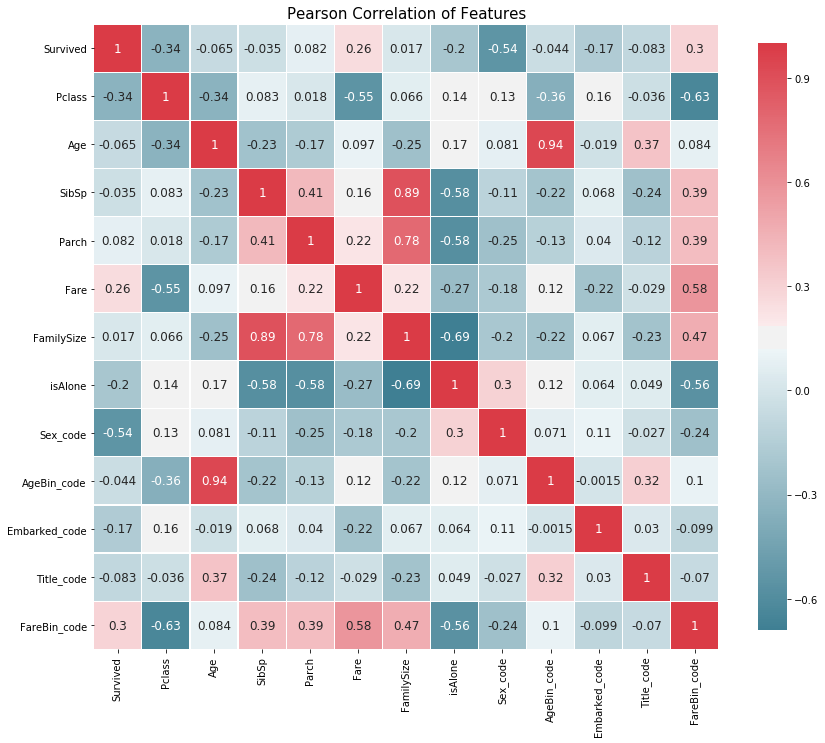

In [88]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [92]:
# use sklearn built-in CART decision tree
split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
clf = tree.DecisionTreeClassifier()
clf.fit(data1[X], data1[y])
clf_predict = clf.predict(data1[X])
result = model_selection.cross_validate(clf, data1[X], data1[y], cv = split)
# print the accuracy on the training set
print(result['test_score'].mean())

0.8205223880597015


In [90]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("survival") 

'survival.pdf'

In [96]:
# a tree with default params scoring 0.76555, params can be tuned later, but not today XP
data_test['Survived'] = clf.predict(data_test[X])
submit.to_csv("../working/submit.csv", index=False)
submit = data_test[['PassengerId','Survived']]
submit.sample(10)

,PassengerId,Survived
94,986,0
20,912,0
303,1195,0
149,1041,0
176,1068,1
331,1223,1
85,977,0
405,1297,1
132,1024,0
257,1149,0


According to the document of DecisionTreeClassifier: "Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem."
There are several ways of pruning: Reduced error pruning, Error complexity pruning, minimum error pruning, etc. rn I can simply understand the reasoning, but implementing is beyond my scope... 憨憨挠头
https://pdfs.semanticscholar.org/025b/8c109c38dc115024e97eb0ede5ea873fffdb.pdf![image.png](attachment:image.png)

In [ ]:
# todo: C4.5 tree 

# Decision Tree
- Decision tree is one of the approaches used for classification. It can be roughly devided as two steps, tree construction and pruning. 
- A **nonparametric model**, because the number of parameters is not determined prior to training compared to parametric model such as linear model

## ID3
ID3 is a top-down, greedy algorithm and also the simplest tree construction method. We need to use **Information Gain** which measures the expected reduction in Entropy.  
Shannon's entropy: $Info(X) = -\sum_{i=1}^{m}P(X_i)\log_2P(X_i)$   
where event X has m possible outcomes, and the prob. of each outcome i is $P(X_i)$  
Information Gain: $Gain(X,a) = Info(X) - \sum_{v=1}^{v}\frac{|X^v|}{|X|}Info(X^v)$
where a is a discrete feature that has v outcomes

## C4.5
- using **Gain Ratio** since information gain is biased toward tests with many outcomes
- Gain Ratio(A) = $\frac{Info(D)-Info_A(D)}{-\sum{j=1}{v}\frac{|D_j|}{|D|}*\log_2\frac{|D_j|}{|D|}}$
- able to deal with continuous features (choose the range with the highest ratio)
- can work with incomplete data
- not very efficient

## CART
- Scikitlearn uses CART(Classification And Regression Tree), only binary tree.  
- Gini impurity: $G_i = 1 - \sum_{k=1}^{n}P_{i,k}^2$  
where $P_{i,k}^2$ is the ratio of class k instances among the training instances in the $i^{th}$ node.
- greedy algorithm to find a reasonably good solution, since optimal solution is NP-complete.